# Functions

In [72]:
using Graphs, SimpleWeightedGraphs
using GraphPlot, Compose, Cairo, Fontconfig
using Colors, GraphRecipes, NetworkLayout
using Random, Plots
using CairoMakie

function create_weighted_graph(n)
    sources = Vector{Int64}()
    destinations = Vector{Int64}()
    weights = Vector{Float64}()

    for i in 1:n
        for j in 1:n-1
            append!(sources, i)
            append!(weights, round(rand(), sigdigits=3))
        end
        x = []
        for k in 1:n
            append!(x,k)
        end

        filter!(e->e≠i,x)
        append!(destinations, x)
    end

    edgelabel_dict = Dict()

    edgelabel_mat = Array{String}(undef, n, n)
    for i in 1:n
        for j in 1:n
            edgelabel_mat[i, j] = edgelabel_dict[(i, j)] = string(weights[i])
        end
    end

    g = SimpleWeightedGraph(sources, destinations, weights)

    graphplot(g, names=1:n, curvature_scalar=0.01, nodeshape=:circle, nodesize=:0.3, edgelabel = edgelabel_mat)
    # G = gplot(g, nodelabel=vertices(g), edgelinewidth=10*weight.(edges(g)))
end

function create_symmetric_matrix(n)
    A = rand(n, n)  # Generate a random n x n matrix
    A = (A + A') / 2  # Make it symmetric
    A[1:n+1:end] .= 0  # Set diagonal elements to zero
    A = round.(A, digits=3)
    return A
end


create_symmetric_matrix (generic function with 1 method)

# Code

In [73]:
Random.seed!(122)
n = 10
eta = 0.1
weightmatrix1 = create_symmetric_matrix(n)
G1 = SimpleWeightedGraph(weightmatrix1)
gg1 = graphplot(G1, names=1:n, layout_nk=:wheel, nodeshape=:circle, nodesize=:0.2, curvature_scalar=0.01)
# gg1 = gplot(G1, nodelabel=vertices(G1), edgelinewidth=weight.(edges(G1)))

global weightmatrix2 = copy(weightmatrix1)

n_trials = 3
for nn in 1:n_trials
    local random_vertices = [rand(1:n), rand(1:n)]
    for j in 1:2
        if random_vertices[1]==random_vertices[2]
            random_vertices[1]=rand(1:n)
        end
    end

    weightmatrix2[random_vertices[1], random_vertices[2]]+=weightmatrix2[random_vertices[1], random_vertices[2]]
    weightmatrix2[random_vertices[2], random_vertices[1]] = weightmatrix2[random_vertices[1], random_vertices[2]]

    for i in 1:n
        for k in 1:n
            if i != random_vertices[1] && i != random_vertices[2] && k != random_vertices[1] && k != random_vertices[2]
                weightmatrix2[i, k] = 0.8*weightmatrix2[i, k]
                weightmatrix2[k, i] = 0.8*weightmatrix2[k, i]
            end
        end
    end

    for i in 1:n
        for k in 1:n
            if weightmatrix2[i,k] < 0.05
                weightmatrix2[i, k] = 0.0
                weightmatrix2[k, i] = 0.0
            end
        end
    end

end

for i in 1:n
    for j in 1:n
        weightmatrix2[i,j] = round(weightmatrix2[i,j], sigdigits=2)
    end
end


# Plot

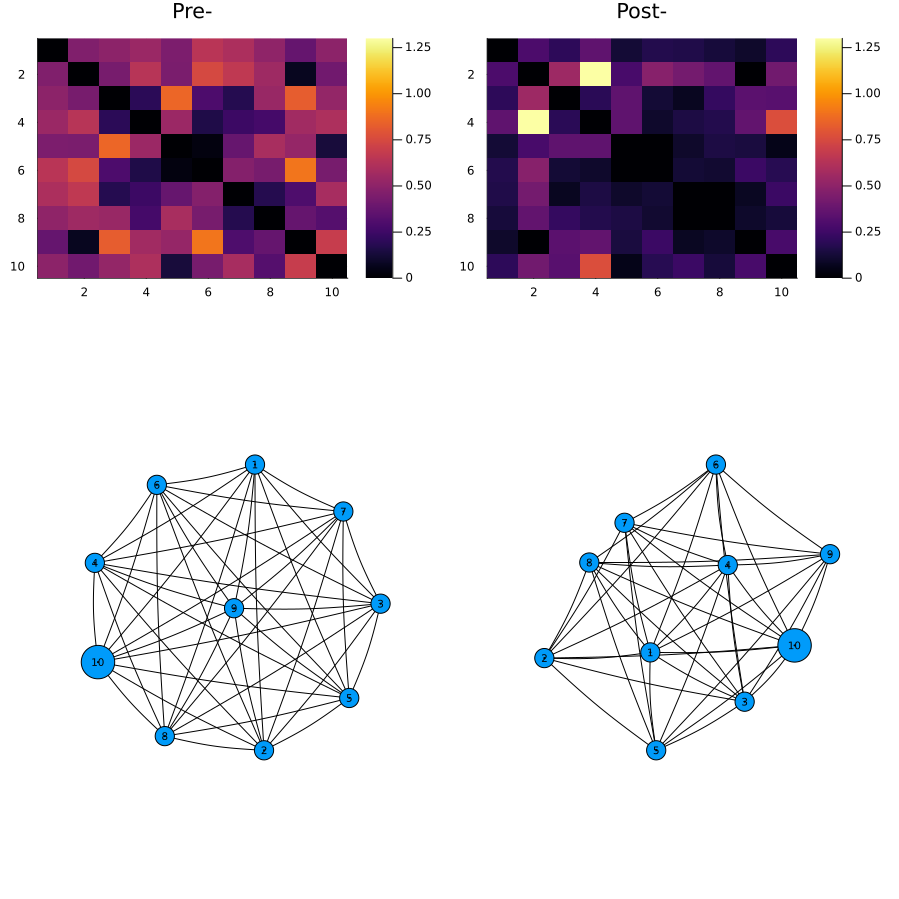

In [74]:

P1 = Plots.heatmap(weightmatrix1, yflip=true, clim=(0,maximum((maximum(weightmatrix2),maximum(weightmatrix1)))), title="Pre-")
P2 = Plots.heatmap(weightmatrix2, yflip=true, clim=(0,maximum((maximum(weightmatrix2),maximum(weightmatrix1)))), title="Post-")

G2 = SimpleWeightedGraph(weightmatrix2)
gg2 = graphplot(G2, names=1:n, layout_nk=:circular, nodeshape=:circle, nodesize=:0.2, curvature_scalar=0.01)
# gg2 = gplot(G2, nodelabel=vertices(G2), edgelinewidth=weight.(edges(G2)))

Plots.plot(P1, P2, gg1, gg2, layout=Plots.grid(2,2, heights=[0.3 , 0.7]), size=(900,900))

# using DataFrames

# df = DataFrame(weightmatrix2, :auto)

In [75]:
clust1 = global_clustering_coefficient(G1)
clust2 = global_clustering_coefficient(G2)

println(clust1)
println(clust2)

1.0


0.9230769230769231
